In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import rebound

c1 = '#990099'
c2 = '#4d0099'
c3 = '#009900'

%matplotlib inline

# Obtención de los datos

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Ceres'... Found: 1 Ceres (A801 AA).
Searching NASA Horizons for 'Jupiter'... 

/opt/anaconda3/lib/python3.7/site-packages/rebound/horizons.py:140: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


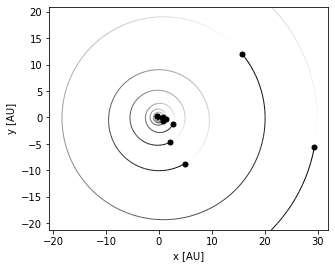

In [2]:
"""En este caso sólo usaremos REBOUND por el momento 
para obtener el semieje mayor de los objetos y graficar"""

# Declarando la simulación 

sim = rebound.Simulation()      
sim.units = ('AU', 'yr', 'Msun')
sim.integrator = "whfast" 

# Añadiendo objetos

Sol = ['Sun']
sim.add(Sol)
Objetos = ['Mercury','Venus','Earth','Mars','Ceres','Jupiter','Saturn','Uranus','Neptune']
sim.add(Objetos)

sim.move_to_com()

# Graficando

fig = rebound.OrbitPlot(sim, unitlabel="[AU]")
plt.savefig('orbit.pdf',bbox_inches='tight');

In [3]:
N = len(sim.particles)

Numero  = []
Semieje = []

for i in range(1,N):
    Numero.append(i)                   # Añade la posición en el ciclo
    Semieje.append(sim.particles[i].a) # Añade el semieje mayor

# Análisis de Titius-Bode

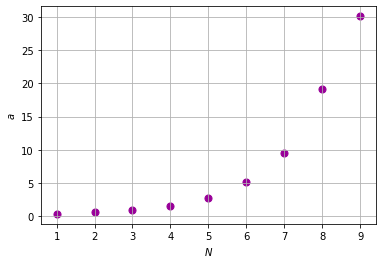

In [4]:
fig, ax = plt.subplots()
ax.grid(True)

ax.scatter(Numero,Semieje, color = c1, s = 50)

ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$a$');

In [5]:
"""Calculando el ajuste de la recta por mínimos cuadrados"""

n = len(Semieje)
i = 0
X, Y, XY, X2 = 0., 0., 0., 0.

for i in range(0,n):
    
    x = Numero[i]
    y = np.log(Semieje[i])
    
    X = X + x      # Suma de las x
    Y = Y + y      # Suma de las y
    XY = XY + x*y  # Suma de x*y
    X2 = X2 + x**2 # Suma de x^2

m = (n*XY - X*Y)/(n*X2 - X**2)    # Valor de la pendiente
b = ((X2*Y)-(XY*X))/(n*X2 - X**2) # Valor de la ordenada al origen

In [6]:
B = np.exp(b)
D = np.exp(m)

Numero_ajuste = np.linspace(0,n+1,100)
Semieje_ajuste = B * D**(Numero_ajuste)

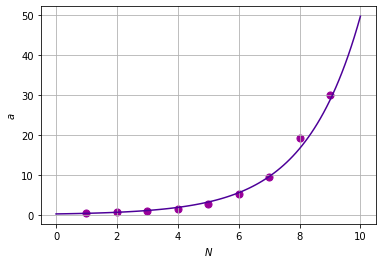

In [7]:
fig, ax = plt.subplots()
ax.grid(True)

ax.scatter(Numero,Semieje, color = c1, s = 50)
ax.plot(Numero_ajuste,Semieje_ajuste, color = c2)

ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$a$');